## **1. Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **2. Generating Synthetic Dataset**

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
num_rows = 10000
data = {
    "Machine_ID": np.arange(1, num_rows + 1),
    "Temperature": np.random.normal(loc=90, scale=30, size=num_rows),  # Normal distribution around 90°C
    "Run_Time": np.random.uniform(10, 500, num_rows),  # Uniform distribution between 10 and 500 hours
}

# Calculate downtime flag based on conditions
def calculate_downtime(temp, runtime):
    # Higher probability of downtime for higher temperature and runtime
    return 1 if (temp > 100 and runtime > 400) or np.random.random() < 0.2 else 0

data["Downtime_Flag"] = [
    calculate_downtime(temp, runtime) for temp, runtime in zip(data["Temperature"], data["Run_Time"])
]

# Create DataFrame
df = pd.DataFrame(data)

# Ensure realistic values (clip any outliers)
df["Temperature"] = df["Temperature"].clip(50, 150)  # Limit temperatures to realistic range
df["Run_Time"] = df["Run_Time"].clip(10, 500)

df["Temperature"] = np.round(df['Temperature'],2)  # Limit temperatures to realistic range
df["Run_Time"] = np.round(df['Run_Time'],2)
# Save to CSV
df.to_csv("machine_downtime.csv", index=False)
print("Synthetic dataset generated and saved as 'machine_downtime.csv'")

# Display sample data
df.head()

Synthetic dataset generated and saved as 'machine_downtime.csv'


,Machine_ID,Temperature,Run_Time,Downtime_Flag
0,1,104.90,167.42,1
1,2,85.85,60.48,0
2,3,109.43,45.19,0
3,4,135.69,56.20,0
4,5,82.98,295.61,0


## **3. Load the dataset**

In [3]:
df = pd.read_csv('machine_downtime.csv')
df.sample(10)

,Machine_ID,Temperature,Run_Time,Downtime_Flag
4515,4516,62.62,159.58,1
7511,7512,150.00,100.50,0
2764,2765,97.59,301.80,0
6731,6732,63.48,192.21,0
8044,8045,118.60,223.45,1
3407,3408,93.79,96.27,0
8590,8591,133.64,260.44,0
2108,2109,80.14,139.92,0
6512,6513,67.15,416.19,0
2706,2707,94.35,29.85,0


## **4. Split the target and dependent variables**

In [4]:
X = df.iloc[:,1:3]
y = df.iloc[:,3]
X.head()

,Temperature,Run_Time
0,104.90,167.42
1,85.85,60.48
2,109.43,45.19
3,135.69,56.20
4,82.98,295.61


In [5]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Downtime_Flag, dtype: int64

## **4. Exploratory Data Analysis**

In [6]:
df.describe()
df.info()
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Machine_ID     10000 non-null  int64  
 1   Temperature    10000 non-null  float64
 2   Run_Time       10000 non-null  float64
 3   Downtime_Flag  10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


Machine_ID       0
Temperature      0
Run_Time         0
Downtime_Flag    0
dtype: int64

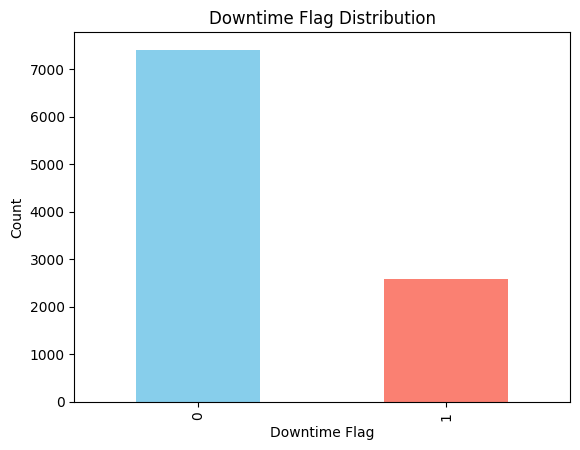

In [7]:
y.value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Downtime Flag Distribution")
plt.xlabel("Downtime Flag")
plt.ylabel("Count")
plt.show();

In [8]:
# Summarize Statistics by Downtime_Flag
X["Downtime_Flag"] = y
X.groupby("Downtime_Flag").mean()

,Temperature,Run_Time
Downtime_Flag,,
0,88.637462,241.207607
1,97.643056,308.009486


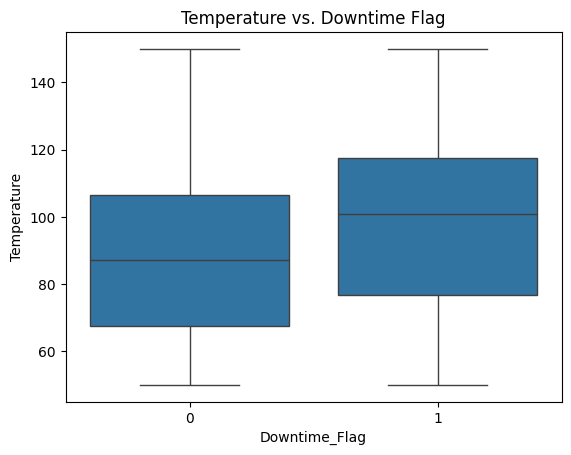

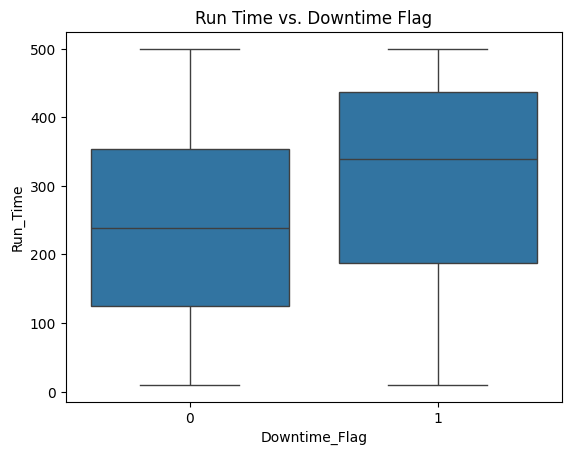

In [9]:
# Detecting outliers
sns.boxplot(x=y, y=X["Temperature"])
plt.title("Temperature vs. Downtime Flag")
plt.show()

sns.boxplot(x=y, y=X["Run_Time"])
plt.title("Run Time vs. Downtime Flag")
plt.show()


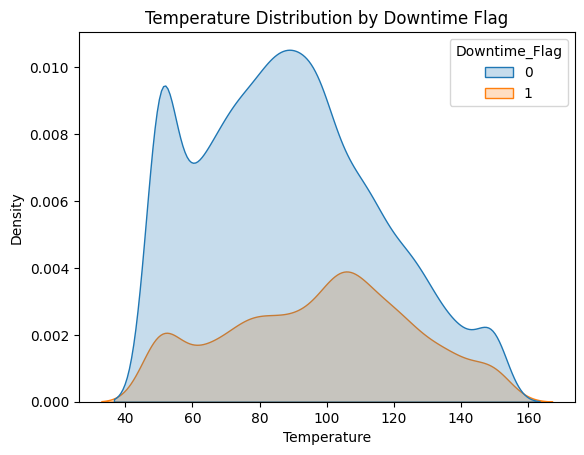

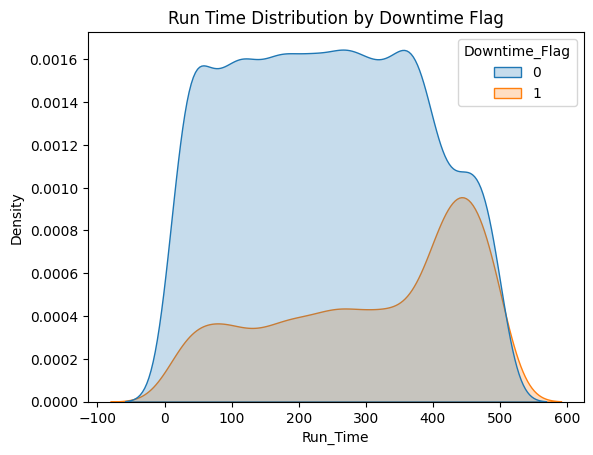

In [10]:
sns.kdeplot(data=X, x="Temperature", hue="Downtime_Flag", fill=True)
plt.title("Temperature Distribution by Downtime Flag")
plt.show()

sns.kdeplot(data=X, x="Run_Time", hue="Downtime_Flag", fill=True)
plt.title("Run Time Distribution by Downtime Flag")
plt.show()


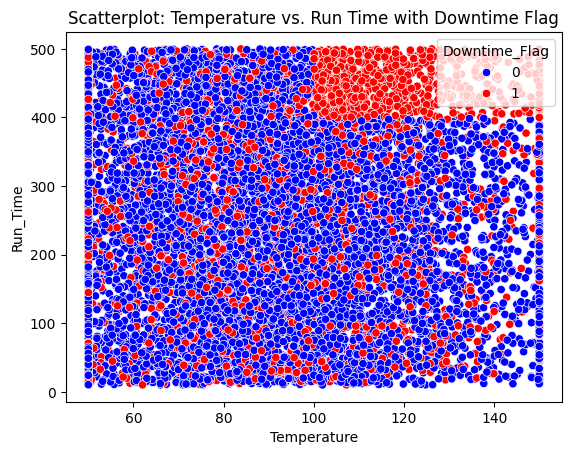

In [11]:
sns.scatterplot(x=X["Temperature"], y=X["Run_Time"], hue=y, palette=["blue", "red"])
plt.title("Scatterplot: Temperature vs. Run Time with Downtime Flag")
plt.show()

C:\Users\maazs\AppData\Local\Temp\ipykernel_5512\3002172919.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = X.pivot_table(index="Temperature_Bins", columns="Run_Time_Bins", values="Downtime_Flag", aggfunc="mean")


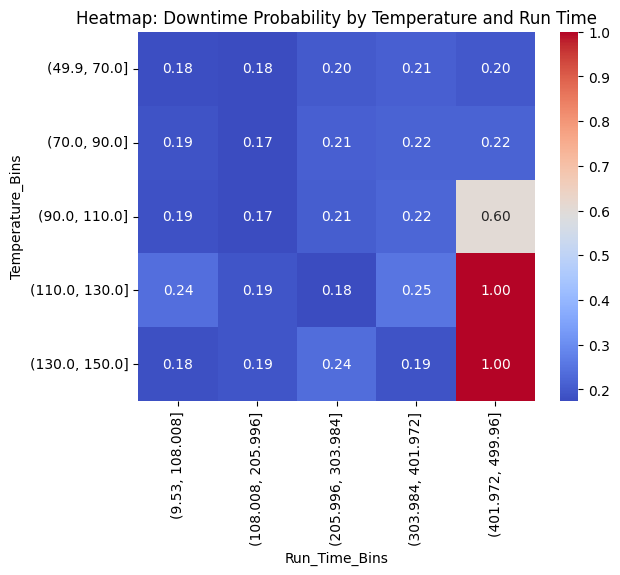

In [12]:
X["Downtime_Flag"] = y
X["Temperature_Bins"] = pd.cut(X["Temperature"], bins=5)
X["Run_Time_Bins"] = pd.cut(X["Run_Time"], bins=5)

heatmap_data = X.pivot_table(index="Temperature_Bins", columns="Run_Time_Bins", values="Downtime_Flag", aggfunc="mean")
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Heatmap: Downtime Probability by Temperature and Run Time")
plt.show();

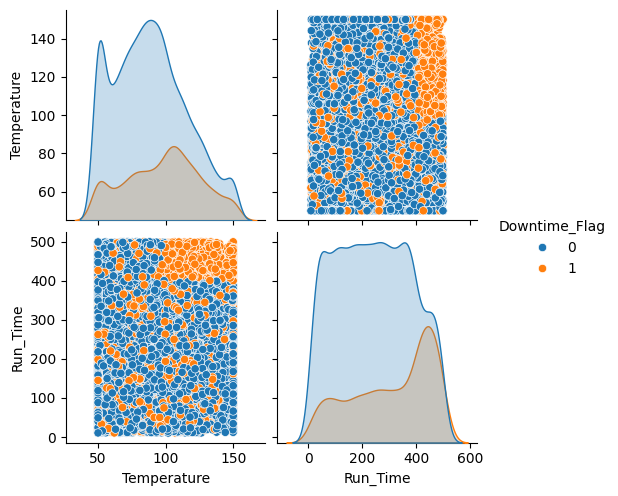

In [13]:
sns.pairplot(X, hue="Downtime_Flag", vars=["Temperature", "Run_Time"])
plt.show()

## **5. Train Test Split**

In [14]:
df['Downtime_Flag'].value_counts(normalize=True)

Downtime_Flag
0    0.7412
1    0.2588
Name: proportion, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:3]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.head()

,Temperature,Run_Time
9069,111.74,332.20
2603,54.31,308.08
7738,96.30,460.16
1579,65.69,379.09
5058,85.84,91.10


In [17]:
y_train.head()

9069    0
2603    0
7738    0
1579    0
5058    0
Name: Downtime_Flag, dtype: int64

In [18]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **6. Training multiple models**

### **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with best practices
logreg = LogisticRegression(
    penalty="l2",
    C=1.5,
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7686666666666667
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      2243
           1       0.85      0.10      0.18       757

    accuracy                           0.77      3000
   macro avg       0.81      0.55      0.52      3000
weighted avg       0.79      0.77      0.69      3000



### **Decision Tree Classifier**

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with tuned parameters
dt_model = DecisionTreeClassifier(
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,  # Minimum samples at a leaf node  # Handle class imbalance
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      2243
           1       0.77      0.30      0.43       757

    accuracy                           0.80      3000
   macro avg       0.79      0.63      0.66      3000
weighted avg       0.80      0.80      0.77      3000



### **RandomForestClassifier**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=15,  # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,  # Minimum samples at a leaf node
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2243
           1       0.98      0.27      0.43       757

    accuracy                           0.82      3000
   macro avg       0.89      0.64      0.66      3000
weighted avg       0.85      0.82      0.77      3000



### **XGBClassifier**

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost with tuned parameters
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,  # Maximum tree depth
    learning_rate=0.5,  # Learning rate for boosting
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle imbalance
    random_state=42,
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.81      0.64      0.71      2243
           1       0.34      0.55      0.42       757

    accuracy                           0.62      3000
   macro avg       0.57      0.59      0.57      3000
weighted avg       0.69      0.62      0.64      3000



## **7. Handling class imbalance**

In [43]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Initialize SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution before resampling:", Counter(y_train))
print("Class distribution after resampling:", Counter(y_resampled))

Class distribution before resampling: Counter({0: 5169, 1: 1831})
Class distribution after resampling: Counter({0: 4501, 1: 4501})


In [44]:
X_resampled.head()

,Temperature,Run_Time
0,111.74,332.20
1,54.31,308.08
2,96.30,460.16
3,65.69,379.09
4,85.84,91.10


## **8. Training multiple models after resampling**

### **Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Logistic Regression with balanced class weights
logreg = LogisticRegression(
    solver="liblinear",  # Good for small datasets
    class_weight="balanced",  # Handle class imbalance
    random_state=42
)
logreg.fit(X_resampled, y_resampled)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      2243
           1       0.32      0.55      0.41       757

    accuracy                           0.60      3000
   macro avg       0.56      0.58      0.55      3000
weighted avg       0.68      0.60      0.62      3000



### **Decision Tree Classifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with tuned parameters
dt_model = DecisionTreeClassifier(
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,  # Minimum samples at a leaf node
    class_weight="balanced",  # Handle class imbalance
    random_state=42
)
dt_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2243
           1       0.50      0.38      0.43       757

    accuracy                           0.75      3000
   macro avg       0.66      0.63      0.63      3000
weighted avg       0.73      0.75      0.74      3000



In [47]:
import joblib

# Create a dictionary to store the model and its parameters
model_data = {
    "model": dt_model,               # Save the trained Random Forest model
    "parameters": dt_model.get_params()  # Save the model's parameters
}

# Save the dictionary to a file
joblib.dump(model_data, "best_models/decision_tree_with_params.joblib")
print("DecisionTreeClassifier and parameters saved.")

DecisionTreeClassifier and parameters saved.


### **Random Forest Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=15,  # Maximum depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    min_samples_leaf=5,  # Minimum samples at a leaf node
    class_weight="balanced",  # Handle class imbalance
    random_state=42
)
rf_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      2243
           1       0.49      0.41      0.45       757

    accuracy                           0.75      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.73      0.75      0.74      3000



In [49]:
# Create a dictionary to store the model and its parameters
model_data = {
    "model": rf_model,               # Save the trained Random Forest model
    "parameters": rf_model.get_params()  # Save the model's parameters
}

# Save the dictionary to a file
joblib.dump(model_data, "best_models/random_forest_with_params.joblib")
print("RandomForestClassifier and parameters saved.")

RandomForestClassifier and parameters saved.


### **XGBoost Classifier**

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# XGBoost with tuned parameters
xgb_model = XGBClassifier(
    n_estimators=200,  # Number of trees
    max_depth=6,  # Maximum tree depth
    learning_rate=0.1,  # Learning rate for boosting
    subsample=0.8,  # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle imbalance
    random_state=42,
)
xgb_model.fit(X_resampled, y_resampled)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.82      0.22      0.35      2243
           1       0.27      0.85      0.41       757

    accuracy                           0.38      3000
   macro avg       0.54      0.54      0.38      3000
weighted avg       0.68      0.38      0.36      3000



## **8. Hyperparameter Tuning**

### **DecisionTreeClasifier**

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    "max_depth": [5, 10, 15, 20],  # Depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum samples at a leaf node
    "criterion": ["gini", "entropy"],  # Split criteria
    "class_weight": [None, "balanced"]  # Handle class imbalance
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring="f1_macro",  # Optimize for F1-score
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit the model on the resampled training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Print performance metrics
print("Tuned Decision Tree Performance:")
print(classification_report(y_test, y_pred_best_dt))


Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Tuned Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2243
           1       0.97      0.28      0.43       757

    accuracy                           0.82      3000
   macro avg       0.89      0.64      0.66      3000
weighted avg       0.85      0.82      0.77      3000



In [56]:
from sklearn.metrics import make_scorer, recall_score

# Custom scorer for recall of class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# Define the parameter grid
param_grid = {
    "max_depth": [5, 10, 15, 20],  # Depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum samples at a leaf node
    "criterion": ["gini", "entropy"],  # Split criteria
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
grid_search_recall = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring=recall_scorer,  # Optimize for recall of class 1
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_recall.fit(X_train, y_train)

# Best parameters for class 1 recall
print("Best Parameters for Class 1 Recall:", grid_search_recall.best_params_)

# Evaluate the best model
best_recall_model = grid_search_recall.best_estimator_
y_pred_recall = best_recall_model.predict(X_test)

print("Performance Optimized for Class 1 Recall:")
print(classification_report(y_test, y_pred_recall))

Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best Parameters for Class 1 Recall: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Performance Optimized for Class 1 Recall:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2243
           1       0.50      0.37      0.43       757

    accuracy                           0.75      3000
   macro avg       0.65      0.62      0.63      3000
weighted avg       0.73      0.75      0.74      3000



C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [58]:
from sklearn.metrics import make_scorer, f1_score

# Custom scorer for F1-score of class 1
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)
# Define the parameter grid
param_grid = {
    "max_depth": [5, 10, 15, 20],  # Depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum samples required to split a node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum samples at a leaf node
    "criterion": ["gini", "entropy"],  # Split criteria
    "class_weight": [None, "balanced"]  # Handle class imbalance
}
# Perform Grid Search
grid_search_f1_class_1 = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring=f1_class_1_scorer,  # Optimize for F1-score of class 1
    cv=3,
    verbose=2,
    n_jobs=-1,
)

grid_search_f1_class_1.fit(X_train, y_train)

# Best parameters for class 1 F1-score
print("Best Parameters for F1-Score of Class 1:", grid_search_f1_class_1.best_params_)

# Evaluate the best model
best_f1_class_1_model = grid_search_f1_class_1.best_estimator_
y_pred_f1_class_1 = best_f1_class_1_model.predict(X_test)

print("Performance Optimized for F1-Score of Class 1:")
print(classification_report(y_test, y_pred_f1_class_1))

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best Parameters for F1-Score of Class 1: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}
Performance Optimized for F1-Score of Class 1:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2243
           1       0.55      0.32      0.41       757

    accuracy                           0.76      3000
   macro avg       0.68      0.62      0.63      3000
weighted avg       0.74      0.76      0.74      3000



In [59]:
dt_model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion="gini",
    class_weight="balanced",
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred_tuned = dt_model.predict(X_test)

print("Performance with Tuned Hyperparameters:")
print(classification_report(y_test, y_pred_tuned))


Performance with Tuned Hyperparameters:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2243
           1       0.69      0.30      0.42       757

    accuracy                           0.79      3000
   macro avg       0.75      0.63      0.64      3000
weighted avg       0.77      0.79      0.76      3000



### **RandomForestClassifier**

In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # Optimize for macro F1-score
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2243
           1       0.46      0.43      0.45       757

    accuracy                           0.73      3000
   macro avg       0.64      0.63      0.64      3000
weighted avg       0.72      0.73      0.73      3000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',  # Optimize for macro F1-score
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate model with best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


### **XGBClassifer**

In [72]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "max_depth": [6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [200, 300, 500],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "scale_pos_weight": [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1_macro",  # Optimize for F1-score
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)
print("Tuned XGBoost Performance:")
print(classification_report(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'scale_pos_weight': 1.0, 'subsample': 0.8}
Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      2243
           1       0.40      0.47      0.43       757

    accuracy                           0.69      3000
   macro avg       0.60      0.61      0.61      3000
weighted avg       0.70      0.69      0.69      3000



## **9. Exporting best model**

### **As DecisionTreeClassifier overall provides better performance with increased accuracy and F1-Score, we will use it as the champion model.**

In [62]:
# Combine model and parameters
model_data = {
    "model": best_dt_model,
    "parameters": grid_search.best_params_
}

print(model_data)

# Save to a single file
joblib.dump(model_data, "best_models/tuned_decision_tree_with_params.joblib")
print("Hyperparameter tuned DecisionTreeClassifer and parameters saved together!")

{'model': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42), 'parameters': {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}}
Hyperparameter tuned DecisionTreeClassifer and parameters saved together!
